In [39]:
import elfi
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from daycare_new import *
#from elfi.examples import daycare

In [40]:
#daycare_model = daycare.get_model()
#elfi.draw(daycare_model)

## Load the observed data

In [41]:
datafile = '/Users/vildehun/Documents/daycare/binaryRealData.mat'
data_obs = sio.loadmat(datafile, squeeze_me=True)

In [42]:
y_obs = list(data_obs['data_epi'])
n_obs_ls = list(data_obs['sample_sizes'])
print(y_obs[0].shape, y_obs[1].shape)

(33, 37) (33, 31)


In [43]:
n_strains = y_obs[0].shape[0]
n_dcc = len(y_obs)
for dcc in range(n_dcc):
    n_obs=y_obs[dcc].shape[0]
    #y_obs[dcc] = np.reshape(y_obs[dcc], (1, n_obs, y_obs[dcc].shape[1]) )
    y_obs[dcc]=np.expand_dims(y_obs[dcc].swapaxes(0, 1), axis=0)
# TODO: need to reshape y_obs to account for batch_size dimension in simulator??

In [44]:
print(y_obs[0].shape, y_obs[1].shape)

(1, 37, 33) (1, 31, 33)


## Testing new functions


In [45]:
t1, t2, t3 = 3.6, 0.6, 0.1
n_obs=36
testdata = daycare(t1, t2, t3)
newtestdata = [testdata[:, dcc, :, :] for dcc in range(29)]

In [46]:
print(testdata.shape, len(newtestdata), newtestdata[0].shape)

(1, 29, 36, 33) 29 (1, 36, 33)


In [47]:
print(
    'test if summary statistics are the same:\n',
np.array_equal(ss_shannon(testdata), ss_shannon_new(newtestdata)),
np.array_equal(ss_prevalence(testdata), ss_prevalence_new(newtestdata)),
np.array_equal(ss_strains(testdata), ss_strains_new(newtestdata)),
np.array_equal(ss_prevalence_multi(testdata), ss_prevalence_multi_new(newtestdata)),
)


test if summary statistics are the same:
 True True True True


In [48]:
data_sim = daycare_new(t1, t2, t3, n_obs_ls)


In [49]:
for dcc in range(len(data_sim)):
    print(data_sim[dcc].shape)

(1, 37, 33)
(1, 31, 33)
(1, 19, 33)
(1, 30, 33)
(1, 31, 33)
(1, 22, 33)
(1, 16, 33)
(1, 23, 33)
(1, 11, 33)
(1, 11, 33)
(1, 25, 33)
(1, 28, 33)
(1, 19, 33)
(1, 21, 33)
(1, 9, 33)
(1, 7, 33)
(1, 21, 33)
(1, 23, 33)
(1, 23, 33)
(1, 31, 33)
(1, 6, 33)
(1, 30, 33)
(1, 26, 33)
(1, 21, 33)
(1, 22, 33)
(1, 16, 33)
(1, 14, 33)
(1, 15, 33)
(1, 23, 33)


In [50]:
print(
    'summary stats for each dcc',
    '\nshannon entropy:\n',
    ss_shannon_new(data_sim),
    '\nnumber of strains:\n',
    ss_strains_new(data_sim),
    '\nprevalence of infection in observed individuals:\n',
    ss_prevalence_new(data_sim),
    '\nprevalence of multiple strains among observed individuals:\n',
    ss_prevalence_multi_new(data_sim)
)


summary stats for each dcc 
shannon entropy:
 [[2.64675059 2.71291552 2.34195517 2.48273439 2.34396044 2.72835237
  2.75110229 2.79972451 1.81848316 2.24503527 2.43841841 2.43369555
  2.47624713 2.33416791 2.02532622 2.04319187 2.3457374  2.83148024
  2.59860518 2.7278432  1.55958116 2.77705033 2.19240492 2.6941537
  2.63133753 2.33937173 2.13839725 2.30565734 2.62156736]] 
number of strains:
 [[17. 17. 13. 15. 12. 17. 17. 18.  7. 10. 14. 14. 13. 13.  8.  8. 12. 18.
  15. 18.  5. 19. 11. 16. 16. 11.  9. 11. 17.]] 
prevalence of infection in observed individuals:
 [[0.86486486 0.80645161 1.         0.86666667 0.67741935 0.81818182
  1.         0.91304348 1.         0.81818182 0.84       0.78571429
  0.78947368 0.9047619  0.88888889 1.         0.85714286 0.82608696
  0.7826087  0.93548387 1.         0.83333333 0.84615385 0.80952381
  0.95454545 0.8125     0.85714286 0.86666667 0.86956522]] 
prevalence of multiple strains among observed individuals:
 [[0.18918919 0.19354839 0.36842105 0.1

In [55]:
ss_obs = [
    ss_shannon_new(y_obs),
    ss_strains_new(y_obs),
    ss_prevalence_new(y_obs),
    ss_prevalence_multi_new(y_obs)
]

ss=[ss_shannon_new(data_sim),
    ss_strains_new(data_sim),
    ss_prevalence_new(data_sim),
    ss_prevalence_multi_new(data_sim)
    ]

In [58]:
print(ss_obs[0].shape, ss[0].shape)
np.vstack(ss).shape

(1, 29) (1, 29)


(4, 29)

In [ ]:
distance(ss, observed=ss_obs)

## Setting up the full model


In [ ]:
seed=30102024

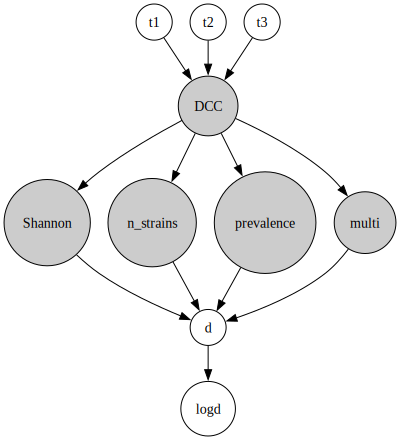

In [ ]:
daycare_model = get_model_new(true_params = [3.6, 0.6, 0.1], n_obs=n_obs_ls)
elfi.draw(daycare_model)

In [ ]:
rej = elfi.Rejection(daycare_model['d'], batch_size=10, seed=seed) # why 'd'?
N = 10



In [ ]:
result = rej.sample(N, quantile=0.01)

ValueError: In executing node 'Shannon': could not broadcast input array from shape (10,1) into shape (10,).

### Notes from meeting with Henri

- generate-method to simulate from model and output by fixing input 'with_values' (dictionary)
- seaborn for plotting, plotnine (ggplot for python, good idea to learn early on)
- when reading papers, focus on the ways they report results, and how you should present your own results (build a set of tools for this, can create a library that collects a lot of plotting methods)
- reuse things that will be reusable!
- solve with both bolfi and abc-smc (1000 samples), batch_size=1 for bolfi
- look at the distribution prior/posterior predictive of data, discrepancy




- set up a repo and share with henri
- do vc in VS code or git command line tools
